In [2]:
import pandas as pd
import numpy as np

from nltk.corpus import stopwords
from textblob import Word
import re
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
import scikitplot as skplt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
#get data
data = pd.read_csv('data\\text_emotion.csv',index_col='tweet_id')
data

,sentiment,author,status
tweet_id,,,
1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...
...,...,...,...
1753918954,neutral,showMe_Heaven,@JohnLloydTaylor
1753919001,love,drapeaux,Happy Mothers Day All my love
1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...


In [4]:
#Preprocessing
data=data.drop('author',axis=1)
#data=data.drop('tweet_id',axis=1)

In [146]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\Shuvo
[nltk_data]     Podder\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Shuvo
[nltk_data]     Podder\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [147]:
#lowercase
lower_case = lambda x:" ".join(x.lower() for x in x.split())
data['status'] = data['status'].apply(lower_case)

#remove punctuation,symbols
data['status'] = data['status'].str.replace('[^\w\s]',' ')

#remove stopwords
stop_word = stopwords.words('english')
stop_words = lambda x:" ".join(x for x in x.split() if x not in stop_word)
data['status'] = data['status'].apply(stop_words)

#lematisation 
ls = lambda x:" ".join([Word(word).lemmatize() for word in x.split()])
data['status'] = data['status'].apply(ls)

#fixing repeatations
def repeat(text):
    pt=re.compile(r"(.)\1{2,}")
    return pt.sub(r"\1\1",text)
rt=lambda x:" ".join(repeat(x) for x in x.split())
data['status'] = data['status'].apply(rt)
data


,sentiment,status
tweet_id,,
1956967341,empty,tiffanylue know listenin bad habit earlier sta...
1956967666,sadness,layin n bed headache ughh waitin call
1956967696,sadness,funeral ceremony gloomy friday
1956967789,enthusiasm,want hang friend soon
1956968416,neutral,dannycastillo want trade someone houston ticke...
...,...,...
1753918954,neutral,johnlloydtaylor
1753919001,love,happy mother day love
1753919005,love,happy mother day mommy woman man long momma so...


In [ ]:
freq= pd.Series(' '.join(data['status']).split()).value_counts()[-10000:]
#remove rarely words
freq=list(freq.index)
data['status'] = data['status'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data

In [ ]:
data.to_csv("data\\clean_data.csv")

In [14]:
data=pd.read_csv("data\\clean_data.csv")
data

,tweet_id,sentiment,status
0,1956967341,empty,tiffanylue know listenin bad habit earlier sta...
1,1956967666,sadness,layin n bed headache ughh waitin call
2,1956967696,sadness,funeral ceremony gloomy friday
3,1956967789,enthusiasm,want hang friend soon
4,1956968416,neutral,dannycastillo want trade someone houston ticke...
...,...,...,...
39995,1753918954,neutral,johnlloydtaylor
39996,1753919001,love,happy mother day love
39997,1753919005,love,happy mother day mommy woman man long momma so...
39998,1753919043,happiness,niariley wassup beautiful follow peep new hit ...


In [15]:
data['sentiment'].unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [7]:
# Dropping rows with other emotion labels
#data = data.drop(data[data.sentiment == 'love'].index)
data = data.drop(data[data.sentiment == 'boredom'].index)
data = data.drop(data[data.sentiment == 'fun'].index)
data = data.drop(data[data.sentiment == 'enthusiasm'].index)

data = data.drop(data[data.sentiment == 'anger'].index)
data = data.drop(data[data.sentiment == 'empty'].index)
data = data.drop(data[data.sentiment == 'relief'].index)
data = data.drop(data[data.sentiment == 'surprise'].index)
data = data.drop(data[data.sentiment == 'hate'].index)
#data = data.drop(data[data.sentiment == 'neutral'].index)
#data = data.drop(data[data.sentiment == 'worry'].index)

In [16]:
# Dropping rows with other emotion labels
#data = data.drop(data[data.sentiment == 'love'].index)
#data = data.drop(data[data.sentiment == 'boredom'].index)
data = data.drop(data[data.sentiment == 'fun'].index)
#data = data.drop(data[data.sentiment == 'enthusiasm'].index)

data = data.drop(data[data.sentiment == 'anger'].index)
data = data.drop(data[data.sentiment == 'empty'].index)
data = data.drop(data[data.sentiment == 'relief'].index)
data = data.drop(data[data.sentiment == 'surprise'].index)
#data = data.drop(data[data.sentiment == 'hate'].index)
data = data.drop(data[data.sentiment == 'neutral'].index)
data = data.drop(data[data.sentiment == 'worry'].index)
data

,tweet_id,sentiment,status
1,1956967666,sadness,layin n bed headache ughh waitin call
2,1956967696,sadness,funeral ceremony gloomy friday
3,1956967789,enthusiasm,want hang friend soon
6,1956968487,sadness,sleep im thinking old friend want married damn...
8,1956969035,sadness,charviray love miss
...,...,...,...
39994,1753918900,happiness,succesfully following tayla
39996,1753919001,love,happy mother day love
39997,1753919005,love,happy mother day mommy woman man long momma so...
39998,1753919043,happiness,niariley wassup beautiful follow peep new hit ...


In [17]:
#Encoding output labels
lbl_enc = preprocessing.LabelEncoder()
y = lbl_enc.fit_transform(data.sentiment.values.astype('U'))

#split data into train 80% and test 20%
x_train,x_val,y_train,y_val = train_test_split(data.status.values.astype('U'),
                                              y,stratify=y,random_state = 42,
                                              test_size = 0.2, shuffle = True)

In [18]:
# Extracting TF-IDF parameters
tfidf = TfidfVectorizer(max_features = 1000,analyzer ='word',ngram_range=(1,3))
x_train_tfidf = tfidf.fit_transform(x_train)
x_val_tfidf =tfidf.fit_transform(x_val)

# Extracting Count Vectors Parameters
count_vect = CountVectorizer(analyzer='word')
count_vect.fit(data['status'].values.astype('U'))
x_train_count = count_vect.transform(x_train)
x_val_count = count_vect.transform(x_val)

In [19]:
#Naive Bayes Classifier
nb = MultinomialNB()
nb.fit(x_train_count,y_train)
y_pred = nb.predict(x_val_count)
#Evaluate
print('Accuracy %s' % accuracy_score(y_pred, y_val))


Accuracy 0.5409587378640777


In [20]:
#precision,recall
print('Accuracy %s' % accuracy_score(y_pred, y_val))
print(classification_report(y_val,y_pred))   #y_val= y_test

Accuracy 0.5409587378640777
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.10      0.01      0.01       152
           2       0.53      0.63      0.58      1042
           3       0.45      0.08      0.13       265
           4       0.53      0.43      0.48       768
           5       0.56      0.75      0.64      1033

    accuracy                           0.54      3296
   macro avg       0.36      0.32      0.31      3296
weighted avg       0.51      0.54      0.51      3296



C:\Users\Shuvo Podder\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


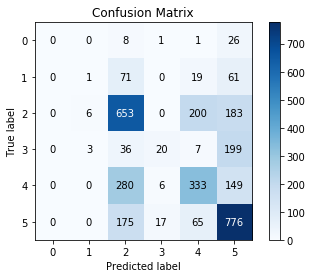

In [21]:
#confusion matrix
skplt.metrics.plot_confusion_matrix(y_val, y_pred)
plt.show()

In [22]:
list(lbl_enc.inverse_transform([0,1,2,3,4,5]))

['boredom', 'enthusiasm', 'happiness', 'hate', 'love', 'sadness']

In [23]:
lbl_enc.classes_

array(['boredom', 'enthusiasm', 'happiness', 'hate', 'love', 'sadness'],
      dtype='<U10')

In [24]:
import pickle
pickle.dump(nb,open('data\\model.sav','wb'))

In [25]:
model  = pickle.load(open('data\\model.sav','rb'))

In [26]:
# Read songs sentiment
song=pd.DataFrame()
song =pd.read_csv("data\\song_lyrics.csv")
song

,title,artist,year,sentiment
0,Temperature,Sean Paul,2006,Trust
1,Promiscuous,Nelly Furtado Featuring Timbaland,2006,Anticipation
2,You're Beautiful,James Blunt,2006,Joy
3,Hips Don't Lie,Shakira Featuring Wyclef Jean,2006,Love
4,Unwritten,Natasha Bedingfield,2006,Trust
...,...,...,...,...
1308,Eyes On You,Chase Rice,2019,Anticipation
1309,All To Myself,Dan + Shay,2019,Sadness
1310,Boyfriend,Ariana Grande & Social House,2019,Joy
1311,Walk Me Home,P!nk,2019,Trust


In [27]:
song['sentiment'].unique()

array(['Trust', 'Anticipation', 'Joy', 'Love', 'Fear', 'Surprise',
       'Sadness', 'Disgust', 'Anger'], dtype=object)

In [28]:
#matchiing sentiment
song=song.replace(to_replace ="Joy", value ="happiness") 
song=song.replace(to_replace ="Sadness", value ="sadness") 
song=song.replace(to_replace ="Anger", value ="anger") 
song=song.replace(to_replace ="Surprise", value ="surprise") 
song=song.replace(to_replace ="Disgust", value ="boredom") 
song=song.replace(to_replace ="Anticipation", value ="enthusiasm") 
song=song.replace(to_replace ="Love", value ="love") 
song=song.replace(to_replace ="Fear", value ="worry") 


In [29]:
song

,title,artist,year,sentiment
0,Temperature,Sean Paul,2006,Trust
1,Promiscuous,Nelly Furtado Featuring Timbaland,2006,enthusiasm
2,You're Beautiful,James Blunt,2006,happiness
3,Hips Don't Lie,Shakira Featuring Wyclef Jean,2006,love
4,Unwritten,Natasha Bedingfield,2006,Trust
...,...,...,...,...
1308,Eyes On You,Chase Rice,2019,enthusiasm
1309,All To Myself,Dan + Shay,2019,sadness
1310,Boyfriend,Ariana Grande & Social House,2019,happiness
1311,Walk Me Home,P!nk,2019,Trust


In [30]:
def emotion(status):
    text = pd.DataFrame([status])
    
    # Doing some preprocessing on these text as done before
    text[0] = text[0].str.replace('[^\w\s]',' ')
    from nltk.corpus import stopwords
    stop = stopwords.words('english')
    text[0] = text[0].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    from textblob import Word
    text[0] = text[0].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
    # Extracting Count Vectors feature from our text
    text_count = count_vect.transform(text[0])
    #Predicting the emotion of the tweet using our already trained linear SVM
    result = model.predict(text_count)
    #print(result)
    #lbl_enc.transform(data.sentiment.values.astype('U'))
    #print(lbl_enc.inverse_transform([result]))
    emotions= lbl_enc.inverse_transform([result])
    for e in emotions:
        st=e
    print("You seems %s today. Here is your recomended songs list: " %st)
   
    #print(song.loc[song['sentiment']==st])
    out=song[song.sentiment==st]
    out = out.drop('year',axis=1) #for better visualization i drop the year column
    print(out )

# User Input Through Text

In [31]:
str = input()
emotion(str)

Things are looking great. It was such a good day
You seems happiness today. Here is your recomended songs list: 
                   title                                   artist  sentiment
2       You're Beautiful                              James Blunt  happiness
9         Be Without You                            Mary J. Blige  happiness
12                Me & U                                   Cassie  happiness
13               Buttons  The Pussycat Dolls Featuring Snoop Dogg  happiness
24    How To Save A Life                                 The Fray  happiness
...                  ...                                      ...        ...
1301     One Thing Right                  Marshmello & Kane Brown  happiness
1303             Tequila                               Dan + Shay  happiness
1306  Talk You Out Of It                     Florida Georgia Line  happiness
1307           Beautiful           Bazzi Featuring Camila Cabello  happiness
1310           Boyfriend             Ari

C:\Users\Shuvo Podder\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:289: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### User Input Though Speech

In [22]:
import speech_recognition as sr

r=sr.Recognizer()
with sr.Microphone() as source:
    print('Say something')
    audio=r.listen(source)   #audio_data = r.record(source, duration=5)
    print("................................")
    
try:
    str=r.recognize_google(audio)
    print("Text: "+str);
    emotion(str)
    
except:
    print('error')
    pass
    

Say something
................................
Text: this day ruined my life
You seems sadness today. Here is your recomended songs list: 
                         title          artist sentiment
11    Over My Head (Cable Car)        The Fray   sadness
25                  Unfaithful         Rihanna   sadness
35              Because Of You  Kelly Clarkson   sadness
50           What's Left Of Me     Nick Lachey   sadness
67         Too Little Too Late            JoJo   sadness
...                        ...             ...       ...
1285             Bury A Friend   Billie Eilish   sadness
1293                     Rumor       Lee Brice   sadness
1295         How Do You Sleep?       Sam Smith   sadness
1309             All To Myself      Dan + Shay   sadness
1312                   Robbery      Juice WRLD   sadness

[115 rows x 3 columns]


C:\Users\Shuvo Podder\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:289: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
